------
## Predicting Global Supply Chain Outcomes using Machine Learning Methods
------

### **AIB Project**

---
## 1.  Data Analysis 
---

## Trends

In [1]:
import warnings; warnings.simplefilter('ignore')
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import aiscm_helper as scmhelper
from ydata_profiling import ProfileReport
import missingno as msno
import pivottablejs as pvt
import datetime as dt
import os
%matplotlib inline

#### Load data 

In [2]:
# Load in the data
_names =['dnum', 'dnum_country', 'dnum_vendor', 'dnum_factory', 'dnum_brand', 'dnum_molecule_test'
         , 'dnum_lpifsi', 'ddate', 'dobject','dtrend']
data_dict = scmhelper.load_clean_data(_names) 
print("Dataframes available: {} \n The data shapes: \n---{}".format(data_dict.keys()
                                                                    ,[d.shape for d in data_dict.values()]))
#Assign to named dataframes
dnum,dnum_country, dnum_vendor,dnum_factory,dnum_brand,dnum_molecule_test,dnum_lpifsi,ddate, dobject, dtrend = [data_dict[n] for n in _names]
dobject = dobject.apply(lambda x: pd.Categorical(x))
ddate['delivery_delay_time'] = ddate['delivery_delay_time'].apply(lambda x: pd.to_timedelta(x))

trying normal method for: ...  0
Sucess for: ...  0
trying normal method for: ...  1
Sucess for: ...  1
trying normal method for: ...  2
Sucess for: ...  2
trying normal method for: ...  3
Sucess for: ...  3
trying normal method for: ...  4
Sucess for: ...  4
trying normal method for: ...  5
Sucess for: ...  5
trying normal method for: ...  6
Sucess for: ...  6
trying normal method for: ...  7
Sucess for: ...  7
trying normal method for: ...  8
Sucess for: ...  8
trying normal method for: ...  9
Sucess for: ...  9
Dataframes available: dict_keys(['dnum', 'dnum_country', 'dnum_vendor', 'dnum_factory', 'dnum_brand', 'dnum_molecule_test', 'dnum_lpifsi', 'ddate', 'dobject', 'dtrend']) 
 The data shapes: 
---[(10324, 9), (10324, 12), (10324, 12), (10324, 12), (10324, 12), (10324, 12), (10324, 22), (10324, 10), (10324, 64), (10324, 6)]


#### Profiling

In [3]:
#dnum,dnum_country, dnum_vendor,dnum_factory,dnum_brand
#,dnum_molecule_test,dnum_lpifsi,ddate, dobject
report =ProfileReport(dnum_country,title="AIB Group 15 - Data Profiling Report")
report.to_file("data/results/AIB_Scm.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Treands

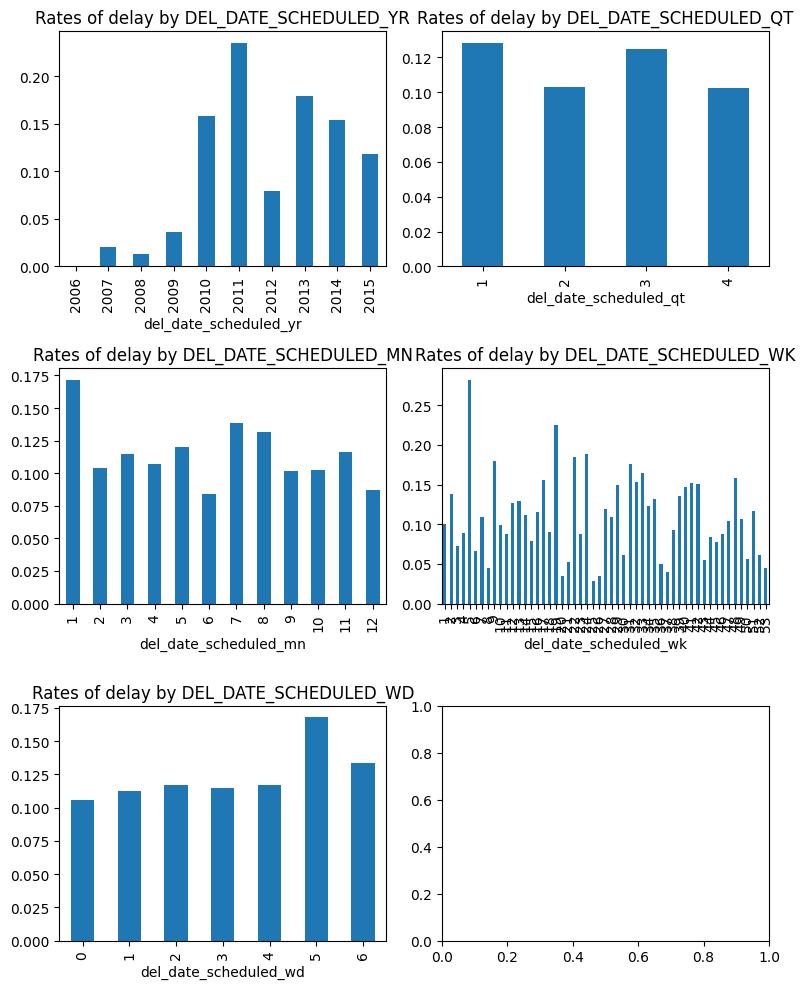

In [4]:
#### over time, can be done
dobject_del = dobject[[c for c in dobject.columns if "del" in c]]
for c in dobject_del:
    dobject_del[c] = pd.to_numeric(dobject_del[c])
# Plot
tcols = ['del_date_scheduled_yr','del_date_scheduled_qt'
 ,'del_date_scheduled_mn', 'del_date_scheduled_wk', 'del_date_scheduled_wd'] 
fig, ((ax0,ax1), (ax2,ax3),(ax4,ax5))= plt.subplots(nrows=3,ncols=2,figsize=(8,10))
axes = [ax0,ax1, ax2,ax3,ax4,ax5]
for i in range(len(tcols)):
    dobject_del.groupby(tcols[i]).agg('mean')['delayed'].plot(kind="bar", ax=axes[i]
                                        ,title = "Rates of delay by "+tcols[i].upper())
plt.tight_layout()

#### Findings..
 
- More delays on items scheduled to arrive over the weekends, but is this significant?
- More delays on items scheduled to arrivein 2010,2011,2013, and 2014, but is this significant?
- Not much signal from the quarter in which we expect delivery to happen. 
    - All very close to the mean of 11.5%
- Looks like these weeks have somewhat high rates of delays 
    - 5, 9, 19, 22, 24
    - 31, 32, 33, 48
    - 40, 41, 42
- Looks like January has higher rates of delay than normal

<Axes: >

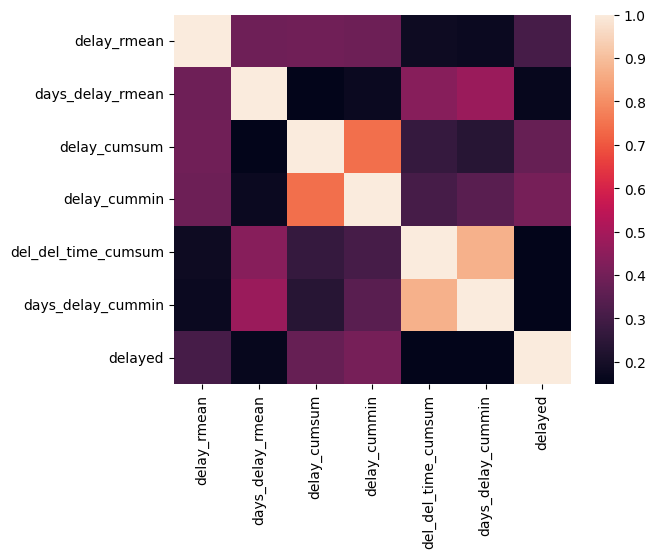

In [5]:
sns.heatmap(pd.concat([dtrend, dobject['delayed'].map({False:0, True:1})], axis=1).corr())

The heatmap display a correlation matrix for several variables related to delivery delays. Correlation values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. The darker shades represent stronger positive correlations, and the lighter shades (particularly the peach or orange tones) indicate stronger negative correlations. Here's an analysis based on the visible patterns:

Variables with Strong Positive Correlation: The variables delay_cumsum (cumulative sum of delays) and del_del_time_cumsum (cumulative sum of delivery delay time) seem to have a strong positive correlation with the target variable delayed. This implies that as the cumulative metrics increase, the likelihood of a delay also increases.

Variables with Negative Correlation: The delay_cumin (cumulative minimum of delays) and days_delay_cumin (cumulative minimum of days delayed) appear to have a negative correlation with delayed. This might suggest that when the cumulative minimum values are higher, the occurrence of delays decreases.

Neutral Correlations: Some variables show neutral or very low correlations with others. For example, delay_mean (mean of delays) does not show a strong correlation with days_delay_mean (mean of days delayed), indicating that the average delay doesn't necessarily relate to the average number of days delayed in a linear way.

Self-Correlation: As expected, the diagonal from the top left to the bottom right shows perfect correlation since it represents each variable's correlation with itself.

Interpretation Caution: It's essential to remember that correlation does not imply causation. High correlation between two variables does not mean that one causes the other. Additionally, the presence of high correlation may warrant further investigation into potential multicollinearity if these variables are used in regression modeling, which can affect model performance and interpretability.

Further Analysis: A more in-depth analysis could include looking into the specific nature of these variables, why certain variables might be cumulative, and how these correlations might influence decision-making in the context of predicting and managing delivery delays. For predictive modeling, features with high correlation to the target variable can be good predictors, but the model's complexity and potential multicollinearity should be carefully managed.

In [6]:
pd.concat([dtrend, dobject['delayed'].map({False:0, True:1})], axis=1).corr()

,delay_rmean,days_delay_rmean,delay_cumsum,delay_cummin,del_del_time_cumsum,days_delay_cummin,delayed
delay_rmean,1.000000,0.389493,0.391467,0.387232,0.178809,0.173494,0.307339
days_delay_rmean,0.389493,1.000000,0.151116,0.174494,0.438381,0.477774,0.162638
delay_cumsum,0.391467,0.151116,1.000000,0.743539,0.270325,0.235184,0.372863
delay_cummin,0.387232,0.174494,0.743539,1.000000,0.307309,0.345503,0.405849
del_del_time_cumsum,0.178809,0.438381,0.270325,0.307309,1.000000,0.872472,0.149018
days_delay_cummin,0.173494,0.477774,0.235184,0.345503,0.872472,1.000000,0.148712
delayed,0.307339,0.162638,0.372863,0.405849,0.149018,0.148712,1.000000


The correlation matrix provided includes various features that seem to be related to the timing and occurrence of delays, with the final column representing the binary variable 'delayed' which indicates whether a delay has occurred. Here's a breakdown of the key correlations presented:

delay_rmean: Represents the rolling mean of delays. It has a moderate positive correlation with itself (1.00) as expected, and shows a moderate positive correlation with 'delayed' (0.307). This suggests that higher rolling means of delay could be associated with an increased likelihood of a delay.

days_delay_rmean: The rolling mean of days delayed. It has a very strong positive correlation with itself (1.00), and a relatively weak correlation with 'delayed' (0.163), indicating that this variable alone might not be a strong predictor for delays.

delay_cumsum: Cumulative sum of delays. It has a very strong positive correlation with itself (1.00) and a moderate positive correlation with 'delayed' (0.373). It also shows a high correlation with 'delay_cummin' (0.744), suggesting that as the cumulative sum of delays increases, the cumulative minimum of delays also tends to be higher.

delay_cummin: Cumulative minimum of delays. It has a perfect correlation with itself (1.00) and a moderate positive correlation with 'delayed' (0.406), indicating it may be a more predictive feature for delays compared to some others.

del_del_time_cumsum: Cumulative sum of the time taken for deliveries. This feature has a perfect self-correlation (1.00) and has a very high positive correlation with 'days_delay_cummin' (0.872). However, it has a relatively weak correlation with 'delayed' (0.149), suggesting that while the cumulative time is highly related to the cumulative minimum days delayed, it may not strongly predict whether a delay will occur.

days_delay_cummin: Cumulative minimum of days delayed. With a perfect self-correlation (1.00) and similar to 'del_del_time_cumsum', it has a weak correlation with 'delayed' (0.149), indicating it may not be a strong standalone predictor for delays.

delayed: The target variable. It shows the highest correlations with 'delay_cummin' (0.406) and 'delay_cumsum' (0.373), suggesting these features may be more relevant in predicting if a delay has occurred.

## Summary:
Strongest Predictors: The features 'delay_cummin' and 'delay_cumsum' seem to be the strongest predictors for the target variable 'delayed' and may be important features to include in predictive modeling.

Potential Redundancy: High correlations between features such as 'delay_cumsum' and 'delay_cummin' (0.744), and 'del_del_time_cumsum' and 'days_delay_cummin' (0.872) suggest redundancy. It could be beneficial to use only one of each correlated pair to reduce multicollinearity in predictive models.

Consider Temporal Dynamics: Given the presence of rolling means and cumulative sums, it's important to consider the temporal dynamics these features represent. Time series models or features that capture trends and seasonal patterns could provide additional predictive power.

Model Interpretability: For interpretability, it may be valuable to understand how changes in each predictor affect the probability of delay. Features with moderate correlations might still be valuable in combination with other variables in a model, despite lower individual predictive power.

## Pair-wise Correlations 

In [7]:
delayed=dobject.delayed

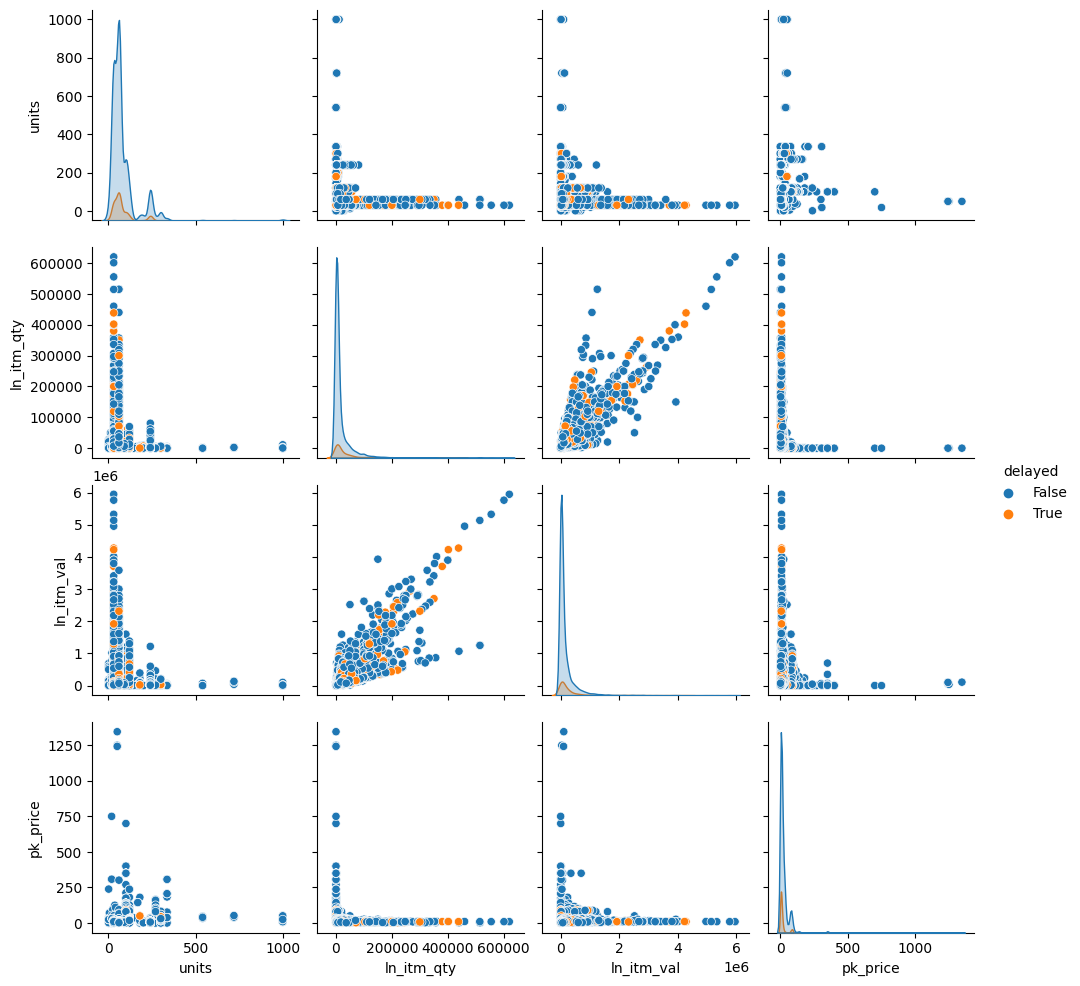

In [8]:
sns.pairplot(pd.concat([dnum.iloc[:,:5], delayed],axis=1).drop(['id'], axis=1)
             , hue="delayed",diag_kind="kde")

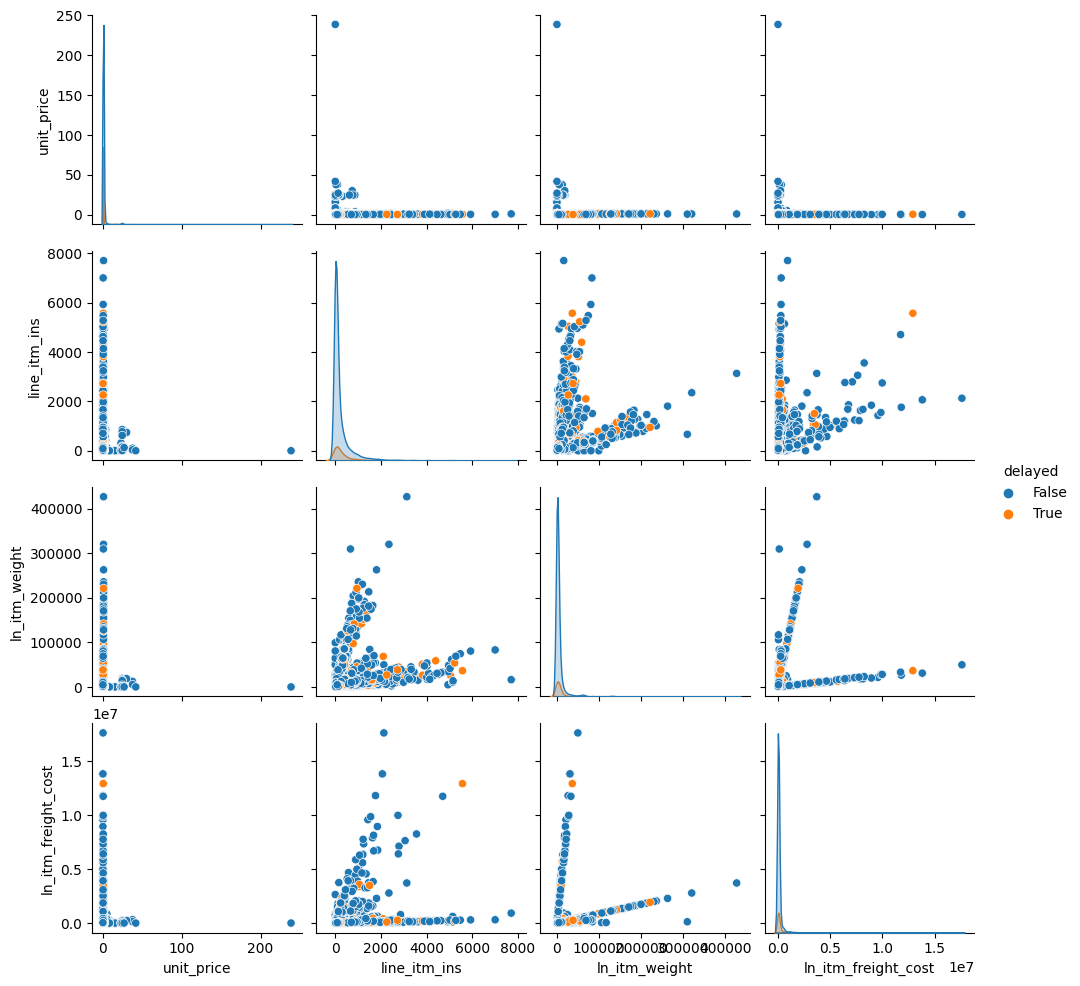

In [9]:
sns.pairplot(pd.concat([dnum.iloc[:,5:], delayed],axis=1), hue="delayed", diag_kind="kde")

#### Findings on pairwise numerical correlations

- individually, there is are wide distributions, will need to scale/log
- Price, weight, quantity, insurance have som high correlations with each other
- Some signal with delayed variable, generally on the lower side in terms of magnitude
- Weight, Cost e.g. have bifurcated relation which is linear but with two different slopes
    - 2 pricing systems/ bulk vs. single? generic? etc.

## Correlations to the target - Delayed

In [10]:
delayed=pd.to_numeric(dobject.delayed)

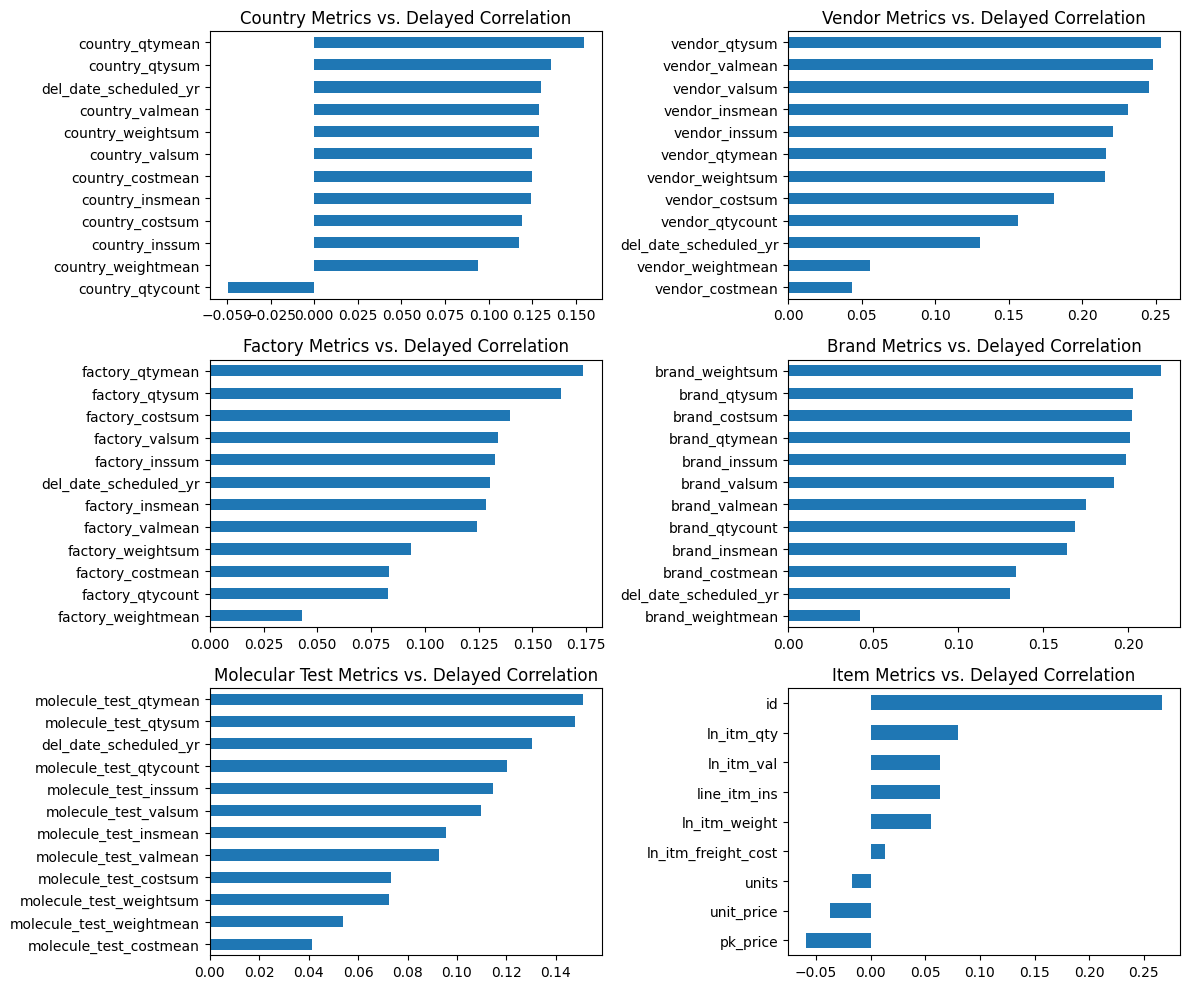

In [11]:
ndfs = [dnum_country, dnum_vendor, dnum_factory, dnum_brand, dnum_molecule_test, dnum]
ttl = ['Country', 'Vendor', 'Factory', 'Brand', 'Molecular Test', 'Item']
fig, ((ax0, ax1),(ax2,ax3),(ax4,ax5))= plt.subplots(nrows=3,ncols=2,figsize=(12,10))
axes = [ax0, ax1,ax2,ax3,ax4,ax5]
for i in range(len(ndfs)):
    pd.concat([ndfs[i],delayed], axis=1).corr().delayed.drop("delayed").sort_values().plot(kind='barh'
                ,title= ttl[i]+" Metrics vs. Delayed Correlation" ,ax = axes[i])
plt.tight_layout()

In [12]:
#dnum
sn =['ln_itm_qty', 'ln_itm_val', 'pk_price','line_itm_ins', 'ln_itm_weight']
# dnum_country
snc =  ['country_qtycount', #'country_qtymean',
        'country_valmean',# 'country_insmean',
       'country_weightmean'#,  'country_costmean'
       ]
# dnum_vendor
snv=[#'vendor', 'vendor_qtycount',
     'vendor_qtysum',
       'vendor_qtymean'
    #, 'vendor_valsum', 'vendor_valmean', 'vendor_inssum',
     #  'vendor_insmean', 'vendor_weightsum',  'vendor_costsum'
]
# dnum_factory
snf=[#'factory',
     'factory_qtycount', 
     'factory_qtymean'#, 'factory_valmean','factory_costmean'
    ]
#dnum_brand
snb = [#'brand',  'brand_qtymean',      
       'brand_valmean'
#       ,'brand_insmean', 'brand_weightsum', 'brand_weightmean', 'brand_costmean'
]
#dnum_molecule_test
snm=[#'molecule_test', 
     'molecule_test_qtycount'
     #,'molecule_test_qtymean', 'molecule_test_valmean'
     ,'molecule_test_insmean']

In [13]:
dn,dnc, dnv = dnum[sn],dnum_country[snc], dnum_vendor[snv] 
dnf, dnb, dnm = dnum_factory[snf],dnum_brand[snb],dnum_molecule_test[snm]
#dt, do

In [14]:
dnum_lpifsi.head()

,dest_count,dest_sum,dest_mean,dest_fsi,dest_customs,dest_infra,dest_intl_ship,dest_logistic_qlty,dest_lpi,dest_timeliness,...,orig_sum,orig_mean,orig_fsi,orig_customs,orig_infra,orig_intl_ship,orig_logistic_qlty,orig_lpi,orig_timeliness,orig_track_trace
0,14.0,0.0,0.0,109.2,2.466331,2.48783,2.748358,2.642761,2.705029,3.135144,...,0.0,0.0,70.4,2.69118,2.90476,3.07813,3.26563,3.070914,3.47458,3.03333
1,12.0,0.0,0.0,78.6,2.888890,2.50000,3.000000,2.800000,2.888855,3.222220,...,0.0,0.0,70.4,2.69118,2.90476,3.07813,3.26563,3.070914,3.47458,3.03333
2,14.0,0.0,0.0,109.2,2.466331,2.48783,2.748358,2.642761,2.705029,3.135144,...,0.0,0.0,39.7,3.88279,4.19133,3.90984,4.20728,4.098695,4.32727,4.11864
3,12.0,0.0,0.0,78.6,2.888890,2.50000,3.000000,2.800000,2.888855,3.222220,...,0.0,0.0,70.4,2.69118,2.90476,3.07813,3.26563,3.070914,3.47458,3.03333
4,12.0,0.0,0.0,78.6,2.888890,2.50000,3.000000,2.800000,2.888855,3.222220,...,0.0,0.0,70.4,2.69118,2.90476,3.07813,3.26563,3.070914,3.47458,3.03333


<Axes: title={'center': 'Correlation of Country Logistics and Fragility Indices vs. Delays'}>

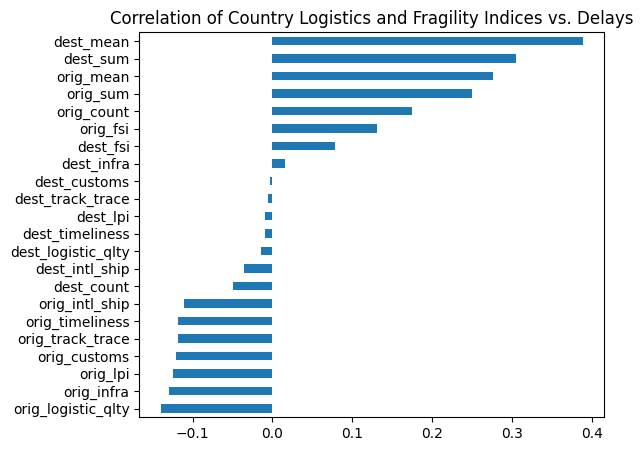

In [15]:
pd.concat([dnum_lpifsi, delayed],axis=1).corr()['delayed'].drop('delayed', axis=0).sort_values().plot(
        kind="barh", title="Correlation of Country Logistics and Fragility Indices vs. Delays"
    , figsize=(6,5))

The bar chart displays the correlation of various country logistics and fragility indices with delays. Correlation values range from approximately -0.1 to 0.4. Here's a breakdown of the key points from the visualization:

Positive Correlations: Several indices have a positive correlation with delays, though the correlations are generally weak (below 0.4). The strongest positive correlation appears to be with variables like dest_mean, dest_sum, and orig_mean. This suggests that higher values of these specific indices are associated with an increased occurrence of delays.

Negative Correlations: Some indices such as orig_fsi, orig_del_date_scheduled_yr, and a few others show negative correlations with delays. This indicates that higher values in these indices might be associated with a reduction in delays or that these indices are higher in places with fewer delays.

Near Zero Correlations: A few indices, such as dest_del_date_scheduled_yr, have correlations very close to zero, indicating no linear relationship with delays.

Insights into Indices: Without specific definitions for each index, it's hard to draw precise conclusions. However, indices prefixed with orig_ seem to represent metrics from the origin country, while dest_ prefixed ones likely pertain to the destination country. Metrics like LPI (Logistics Performance Index) and FSI (Fragility State Index) have been included for both origin and destination, suggesting a consideration of factors from both ends of the shipping process.

Implications for Policy and Operations: Positive correlations with dest_ metrics might indicate that conditions or practices in the destination country influence the likelihood of delays. Conversely, negative correlations with orig_ metrics could imply that certain characteristics of the origin country are associated with more efficient delivery times.

Application in Predictive Models: The indices with the highest correlations, whether positive or negative, could be significant predictors in a model aimed at forecasting delays. These should be examined further to understand the nature of their relationship with delays and how they might be utilized in a predictive model.

Limitation of Correlation Analysis: It's important to note that correlation does not imply causation, and the correlations shown are purely linear relationships. Factors that correlate with delays might not cause them, and the actual cause-and-effect relationship can be more complex.

Overall, this chart provides an initial look into potential factors that could be influencing delivery delays. A more detailed statistical analysis, including causation assessment and multivariate modeling, could provide deeper insights into how these indices impact delays.

In [16]:
snlf = [#'dest_mean', 'dest_sum', 'dest_count'
        #, 'orig_mean', 'orig_sum','orig_count',
    'dest_fsi','dest_intl_ship', 'dest_timeliness'
, 'dest_track_trace', 'dest_customs', 'dest_lpi', 'dest_infra',
        'dest_logistic_qlty',
    'orig_fsi','dest_count','orig_intl_ship', 'orig_timeliness'
, 'orig_track_trace', 'orig_customs', 'orig_lpi', 'orig_infra',
        'orig_logistic_qlty']
dnlf = dnum_lpifsi[snlf]

### Categorical Data Analysis

In [17]:
so =[ #'pq_date_new_yr', 'pq_date_new_mn', 'pq_date_new_dy',
 'po_date_new_yr', 'po_date_new_mn', 'po_date_new_dy',
  'del_date_scheduled_mn', 'del_date_scheduled_dy'
 #, 'del_date_client_yr', 'del_date_client_mn','del_date_client_dy'
 #, 'del_date_recorded_yr', 'del_date_recorded_mn','del_date_recorded_dy'
 #, 'pq_date_new_wd', 'pq_date_new_wk','pq_date_new_qt'
 , 'po_date_new_wd', 'po_date_new_wk', 'po_date_new_qt'
 ,'del_date_scheduled_wd', 'del_date_scheduled_wk','del_date_scheduled_qt'
 #, 'del_date_client_wd', 'del_date_client_wk','del_date_client_qt'
 #, 'del_date_recorded_wd', 'del_date_recorded_wk','del_date_recorded_qt'
 #, 'delayed'
 #, 'proj_code', 'pq_no', 'po_no','ship_no'
 #, 'country'
    , 'mngr', 'fulfill_via', 'vendor_terms'
 ,'ship_mode'
 #, 'pq_date'
 #, 'po_date'
    , 'prod_grp', 'sub_class'
    , 'vendor'
 #,'itm_desc'
 , 'molecule_test', 'brand', 'dosage'
 , 'dosage_form','factory'
    , 'first_line'
 #, 'weight', 'freight_cost'
 ,'del_date_scheduled_yr', 'ship_config', 'weight_captured_seperately'
 ,'freight_invoiced_seperately', 'freight_in_cmdty_cost'
 #,'factory_address'
 , 'origin_country'
    , 'origin_continent'
 #, 'name'
 , 'dest_country'
# , 'orig_origin_country'
]
do =  dobject[so]

## Pipeline

In [18]:
# Import pipeline and preprocessing modules 
from sklearn.preprocessing import FunctionTransformer,PolynomialFeatures, normalize
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, LabelBinarizer ,StandardScaler
from sklearn.pipeline import TransformerMixin, _BaseComposition 
from sklearn.pipeline import FeatureUnion, make_pipeline, Pipeline

In [19]:
log1p = FunctionTransformer(np.log1p)
make_num_pipe = make_pipeline(log1p, StandardScaler()) 
make_num_pipe_2 = make_pipeline(#log1p, 
                                StandardScaler()) 
make_cat_pipe = make_pipeline(scmhelper.Dummifier())
make_lab_pipe = make_pipeline(scmhelper.Labeler())

In [20]:
# Drop redundant columns
entities =['country', 'factory', 'vendor', 'brand', 'molecule_test']
for d in [dnc, dnf, dnv, dnb, dnm]:
    for c in entities:
        try:
            d.drop(c, axis=1, inplace=True)
        except:
            pass
dn,dnc, dnf, dnv, dnb, dnm = [pd.DataFrame(make_num_pipe.fit_transform(d), index=d.index
                            , columns=d.columns) for d in [dn,dnc, dnf, dnv, dnb, dnm]]
dnlf = pd.DataFrame(make_num_pipe_2.fit_transform(dnlf), index=dnlf.index,columns=dnlf.columns)
dtr = pd.DataFrame(make_num_pipe_2.fit_transform(dtrend), index=dtrend.index,columns=dtrend.columns)
y = make_lab_pipe.fit_transform(dobject.delayed.map({True:1, False:0}))
try:
    do.drop('delayed', axis=1, inplace=True)
except:
    pass
do = make_cat_pipe.fit_transform(do)
data = pd.concat([do,dnlf,dn,dnc, dnv, dnf, dnb, dnm, dtr], axis=1)
print(data.shape,ddate.columns)
# Remember the date df will come in handy later for regression

(10324, 719) Index(['del_date_scheduled', 'del_date_client', 'del_date_recorded', 'pq_date',
       'po_date', 'po_date_new', 'pq_date_new', 'anticipated_lead_time',
       'actual_lead_time', 'delivery_delay_time'],
      dtype='object')


## Feature Selection

In [21]:
# Import modules for feature selection
from sklearn.feature_selection import SelectKBest, RFECV, SelectFromModel, VarianceThreshold, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

### Dimension Reduction
### *Principal Components Analysis*


Explained Ratios:
 [0.21824186 0.16135805 0.072715   0.05070266] 
--- 
 TOP 4 Dims Explained Variance:
 0.503017569437363 
--- 
Total Explained Variance:
 0.503017569437363


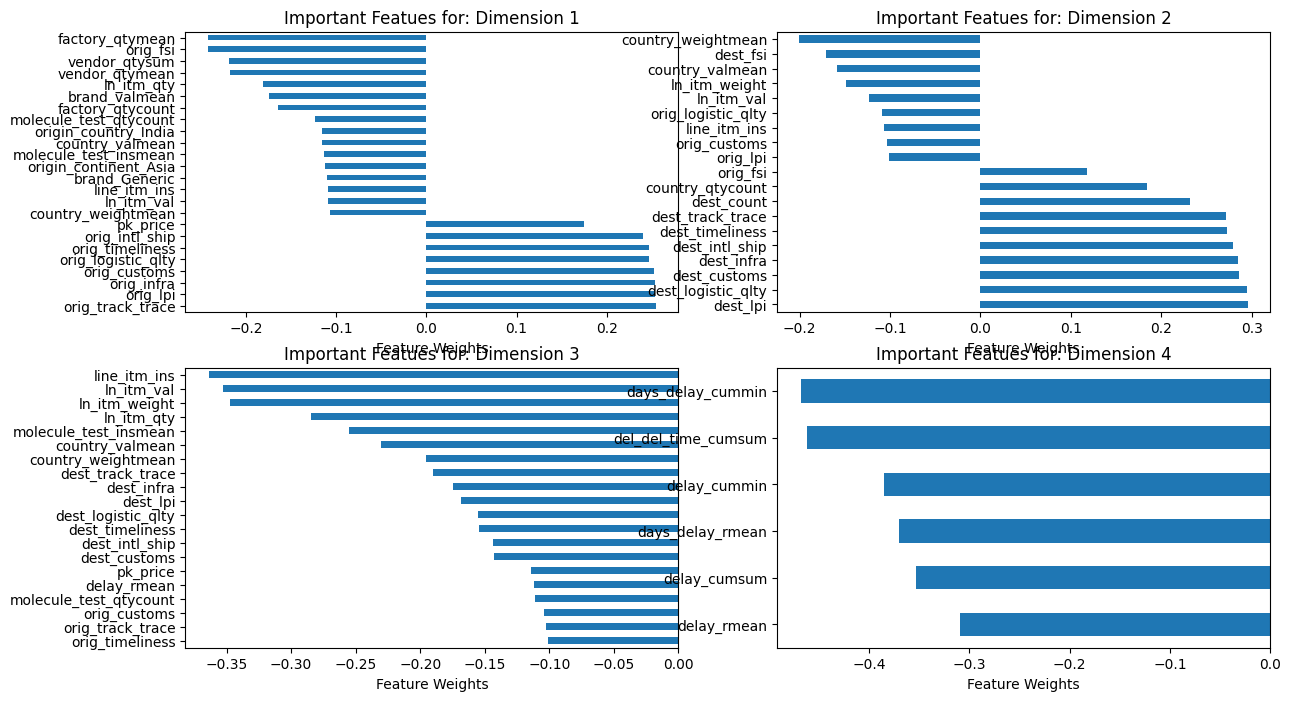

In [22]:
# Try the following and make sure to plot:
#PCA #Isomap
mypca = PCA(n_components=4)
mypca.fit(data)
mypca.transform(data)

print( "\nExplained Ratios:\n {} \n--- \n TOP 4 Dims Explained Variance:\n {} \n--- \nTotal Explained Variance:\n {}" 
    .format(mypca.explained_variance_ratio_
            ,mypca.explained_variance_ratio_[:4].sum(),mypca.explained_variance_ratio_.sum()))
# pca_output = pca_results(data, mypca)

# Plot the dimensions of PCA Components
# with the top contribution features i.e. >10%
scmhelper.pca_results(data,mypca)

The PCA results visualized in the bar charts show the feature weights for the first four principal components or dimensions extracted from the dataset. Here's an analysis based on the provided information and visualizations:

Explained Variance Ratios
The first principal component (Dimension 1) explains approximately 17.44% of the variance in the dataset.
The second principal component (Dimension 2) accounts for about 14.24% of the variance.
The third principal component (Dimension 3) captures around 6.09% of the variance.
The fourth principal component (Dimension 4) explains 5.01% of the variance.
Together, these four components account for roughly 42.77% of the total variance in the dataset.

Feature Weights Analysis
Dimension 1: It appears to be most influenced by orig_fsi and ln_itm_qty. Since PCA combines features based on their variance, this suggests that orig_fsi and ln_itm_qty may vary together in a way that captures a significant amount of information about the dataset's variance.

Dimension 2: The feature with the highest weight is dest_fsi. This might indicate that the fragility of the destination is a dominant aspect that differentiates the data along this component.

Dimension 3: Here, line_itm_ins and ln_itm_val (log of item value) are prominent. This component could be capturing variance related to the financial aspects of the shipments.

Dimension 4: The feature days_delay_cummin has the most weight. This suggests the cumulative minimum of days delayed is significant in this dimension, potentially capturing aspects of timing and scheduling in the data.

Interpreting PCA in Context
Feature Significance: Features with larger absolute weights in each dimension are more significant in defining that specific component. Both positive and negative weights are important; the sign indicates the direction of the feature's effect on the component.

Data Reduction: PCA is often used for dimensionality reduction. In this case, by using four dimensions, you retain over 42% of the variance. Whether this is sufficient depends on the specific requirements of your analysis or modeling task.

Next Steps: You could consider using these four components as inputs to a regression or classification model if the reduced dataset sufficiently captures the necessary information. However, the remaining ~57% of the variance suggests there may be other important information captured in additional components that are not included in these four.

Feature Engineering: The insights from PCA can also inform feature engineering. For instance, if certain features consistently have high weights across multiple components, they may warrant further investigation or direct inclusion in predictive models.

Decision Making: For decision-making purposes, understanding which original features contribute most to the principal components can provide insights into the key factors driving the variability in your data.

### Feature for Random Forest

(719, 2)


<Axes: ylabel='feature'>

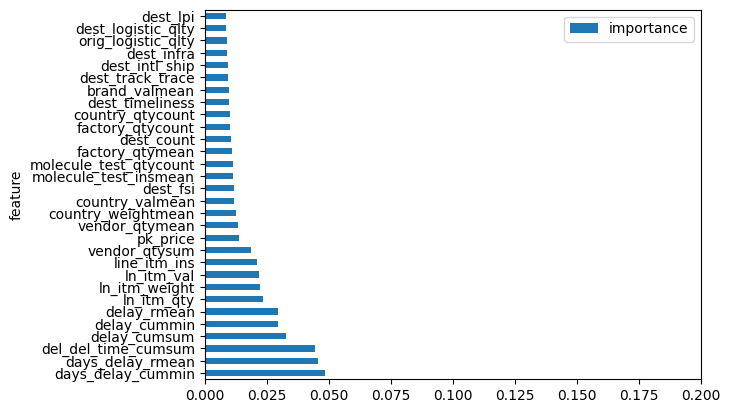

In [23]:
rfc = RandomForestClassifier(random_state=121)
X,y = data, y
rfc.fit(X,y)

# Extract feature importances into a df
features_rfc = X.columns
key_features_rfc = pd.DataFrame(rfc.feature_importances_, features_rfc)
rfc_idx = range(len(key_features_rfc))
key_features_rfc.reset_index(inplace=True)
key_features_rfc.columns=['feature', 'importance']
print(key_features_rfc.shape)
key_features_rfc.set_index('feature').sort_values('importance'
                                , ascending=False)[:30].plot(kind="barh", xlim=(0,0.2))

The bar chart provided, depicts the importance of various features in a predictive model. The lengths of the bars represent the relative importance of each feature when determining the model's predictions. Here's an analysis of the chart:

Top Features: The most important feature, based on this chart, appears to be delay_cummin, followed by days_delay_cummin, and del_del_time_cumsum. These features have the highest importance scores and likely contribute significantly to the model's predictions. This suggests that cumulative minimum delays and delivery times are strong predictors in the dataset.

Medium Importance Features: Features such as ln_itm_weight, ln_itm_qty, vendor_qty_mean, and factory_qty_mean show medium importance. They have a moderate influence on the model's output and likely provide valuable information but less so than the top features.

Lower Importance Features: Several features like dest_customs, dest_lpi, orig_logistic_qty, and dest_logistic_qty have lower importance scores. Although these features contribute to the model's predictions, their impact is less pronounced compared to higher-ranked features.

In [24]:
# Total Variation Explained by first 30 features...
key_features_rfc.set_index('feature').sort_values('importance'
                                , ascending=False)[:30].sum()

importance    0.539217
dtype: float64

### Random Forest Insights - Key Feature Relevance
- Observing modest levels of feature significance is acceptable, 		particularly when variables exhibit some      degree of collinearity. This occurs because collinear features distribute the overall importance among themselves.
- Unlike linear regression models, where collinearity can be problematic and may necessitate the creation of composite features to consolidate their influence into a single variable, ensemble techniques such as Random Forests can adeptly manage collinear variables.
- The primary indicators identified align with those highlighted in the Principal Component Analysis. These include:
    - Historical and accumulated data, like past sums and minimum values of delays, alongside the average rolling mean of delays and the duration of these delays measured in days.
    - Next in line are supply-related metrics, such as vendor volume and product quantity, which also correlate strongly with the findings from the Principal Component Analysis. The impact of branding is similarly notable.
    - Following these are product-centric attributes such as value, quantity, and price, interspersed with client-related aspects such as the stability of the destination country's conditions, logistical efficiency, and the quality of origin logistics.
